In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score

In [3]:
from pygraphs.measure import *
from pygraphs.cluster import *
from pygraphs.graphs import StochasticBlockModel
from pygraphs.scenario import ParallelByGraphs
from pygraphs.measure import logComm_H, logComm_K, kernels

In [4]:
graphs, info = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(200)

In [5]:
results = defaultdict(dict)

In [6]:
colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22'
]

logComm KernelKMeans



logComm KernelKMeans_vanilla



logComm KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logComm KernelKMeans_kernlab



logComm SpectralClustering_sklearn



logComm SpectralClustering_rubanov



logComm SpectralClustering_kernlab_-min



logComm SpectralClustering_kernlab_+100



logComm KernelWard


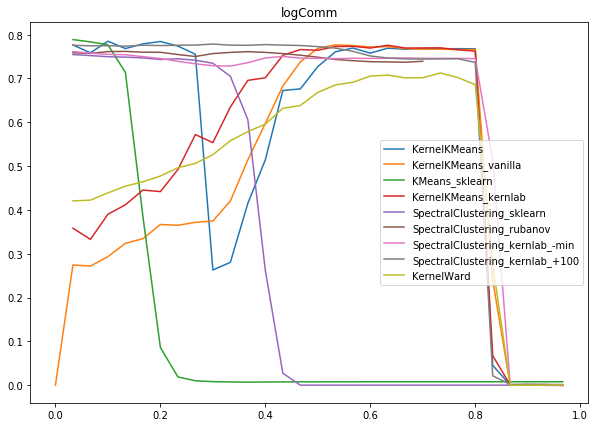

logComm K KernelKMeans



logComm K KernelKMeans_vanilla



logComm K KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logComm K KernelKMeans_kernlab



logComm K SpectralClustering_sklearn



logComm K SpectralClustering_rubanov



logComm K SpectralClustering_kernlab_-min



logComm K SpectralClustering_kernlab_+100



logComm K KernelWard


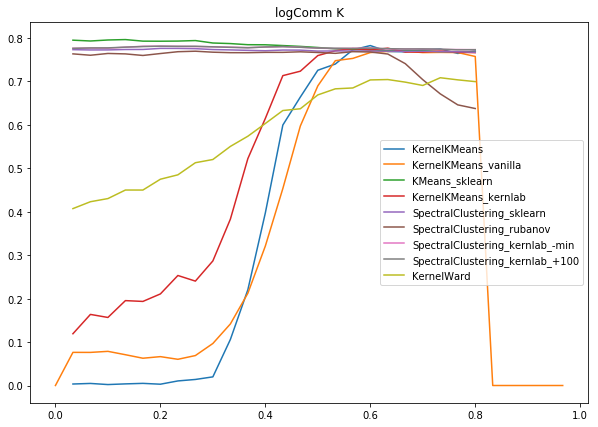

In [9]:
exp = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=True)#, verbose=True)

for measure in [logComm_H, logComm_K]:
    for alg in [
        KKMeans,
        KKMeans_vanilla,
        KMeans_sklearn,
        KKMeans_kernlab,
        SpectralClustering_sklearn,
        SpectralClustering_rubanov,
        SpectralClustering_kernlab,
        SpectralClustering_kernlab_100,
        KWard
    ]:
        print(measure.name, alg.name)
        results[measure.name][alg.name] = exp.perform(alg, measure, graphs, 2, n_jobs=-1)
        with open(measure.name + ' ' + alg.name + '.pkl', 'wb') as f:
            pickle.dump(results[measure.name][alg.name], f)
            
    fig, ax = plt.subplots(1, figsize=(10, 7))
    for idx, (result_name, result_value) in enumerate(results[measure.name].items()):
        plt.plot(result_value[0], result_value[1], label=result_name, color=colors[idx])
    plt.legend()
    plt.title(measure.name)
    plt.show()

In [8]:
result_name

'KernelWard'

## 